In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.head()

/home/nata/programs/jupyter/myapplication/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


milk
month           
1962-01-01   589
1962-02-01   561
1962-03-01   640
1962-04-01   656
1962-05-01   727

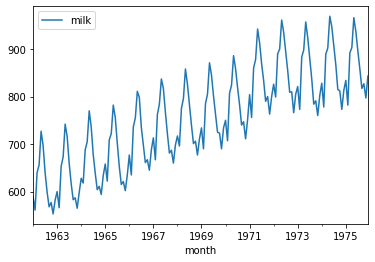

In [3]:
milk.plot()
plt.show()

In [4]:
sm.tsa.stattools.adfuller(milk.values)[1]

0.6274267086030311

Вопрос 5

Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [5]:
milk['daily'] = milk.milk.values / milk.index.days_in_month

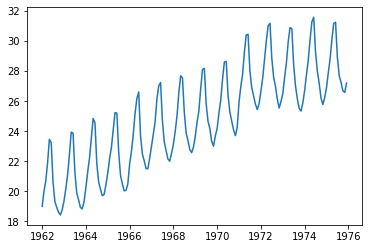

In [6]:
plt.plot(milk.index, milk.daily)
plt.show()

In [7]:
milk.head()

milk      daily
month                      
1962-01-01   589  19.000000
1962-02-01   561  20.035714
1962-03-01   640  20.645161
1962-04-01   656  21.866667
1962-05-01   727  23.451613



Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:



/tmp/ipykernel_6102/1761442990.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff1 = milk.daily - milk.daily.shift(1)


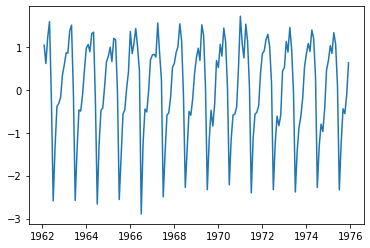

(-2.759469476228923,
 0.06430054654174505,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [8]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)
plt.plot(milk.index, milk.daily_diff1)
plt.show()
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

/tmp/ipykernel_6102/3209246323.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff12 = milk.daily - milk.daily.shift(12)


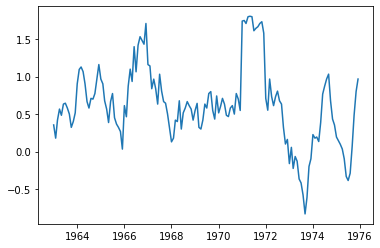

(-2.1594860932888063,
 0.22127672658830438,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [9]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)
plt.plot(milk.index, milk.daily_diff12)
plt.show()
sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости. 

Итак, какое дифференцирование делает ряд стационарным?

In [ ]:
milk.daily_diff12_1 = milk.daily_diff12 - milk.daily.shift(1)
plt.plot(milk.index, milk.daily_diff12_1)
plt.show()
sm.tsa.stattools.adfuller(milk.daily_diff12_1.dropna())

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

In [ ]:
sm.graphics.tsa.plot_acf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50)
plt.show()

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

/tmp/ipykernel_6102/1043044417.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  milk.daily_diff12_1 = milk.daily_diff12 - milk.daily.shift(1)


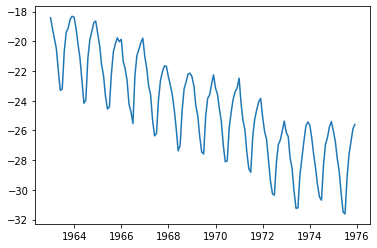

(-1.3525104299962398,
 0.6048198087307807,
 14,
 141,
 {'1%': -3.4776006742422374,
  '5%': -2.882265832283648,
  '10%': -2.5778219289774156},
 151.05674901186376)

In [10]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50);
plt.show()

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

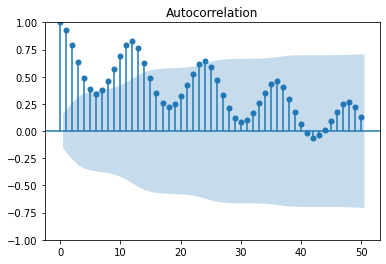

In [11]:
sm.graphics.tsa.plot_acf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50)
plt.show()

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

/home/nata/programs/jupyter/myapplication/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


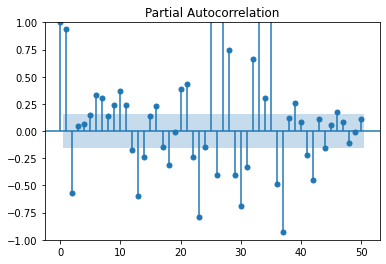

In [12]:
sm.graphics.tsa.plot_pacf(milk.daily_diff12_1.dropna().values.squeeze(), lags=50);
plt.show()